<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/ML/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd

topics_df = pd.read_pickle('/content/drive/My Drive/Colab Datasets/topics_df.pkl')
topics_df.head()

,En,13-middot,600000,a-day-or-two,a-man-may-not-cross-dress,a-tooth-or-an-eye,aaron,aarons-death,aarons-sin,abandoned-corpses,abaye,abba-binyamin,abba-halafta,abel,abels-sacrifice,abiathar,abiel,abigail,abihu1,abijah-of-judah,abijah-the-son-of-jeroboam,abimelech-and-sarah,abimelech-the-son-of-jerubaal,abner,abodes,abortion,abraham,abraham-and-abimelech,abraham-and-hagar,abraham-and-his-environment,abraham-and-lot,abraham-and-sarah,abraham-and-sodom,abraham-and-the-angels,abraham-and-the-hittites,abraham-and-the-kings,abraham-in-egypt,abraham-in-ur-kasdim-and-his-departure-from-there,abrahams-observance-of-the-torah-and-the-commandments,absalom,...,yesh-em-lemikra,yetzer-hara,yetzer-hatov,yidoni,yirat-shamayim,yishmael-ben-netanyah,yishmael-ben-pavi,yitro,yoash-(king-of-israel),yoel,yoktan,yom-kippur,yom-kippur-eve,yom-kippur-offerings,yom-tov,yom-tov-sheini,yose-b-yoezer,yotam,you-shall-not-cut-yourself,you-shall-not-muzzle,young-men,young-men-(נער),young-torah-scholars,young-women,zachor,zaken-mamre,zav,zavah,zeal,zechariah,zedekiah,zedekiah-the-son-of-chenaanah,zekhariyah-ben-yehoyada,zevulun,zilpah,zimri,zion,zionism,zipporah,אהבה-שאינה-תלויה-בדבר
0,mishna teach blemish develop within first year...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,see clear side afraid afraid person strength a...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,modifi mean board refer uniqu name modifi even...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,intercal month perform panel three judg interc...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,statement rabbi eliez correct regard anim offe...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
topics_list = list(topics_df.columns)[1:]
hits = {topic:topics_df[topic].sum() for topic in topics_list}

from collections import Counter
counter = Counter(hits)
top_ten = counter.most_common(10)
for topic, num in top_ten:
     print(f'{topic}: {num}')

laws-of-judges-and-courts: 264
procedures-for-judges-and-conduct-towards-them: 251
rabbinically-forbidden-activities-on-shabbat: 193
dinei-yibum: 172
laws-of-transferring-between-domains: 171
laws-of-the-prohibitions-of-eating-meat: 168
financial-ramifications-of-marriage: 166
laws-of-animal-sacrifices: 159
learning: 153
torah: 136


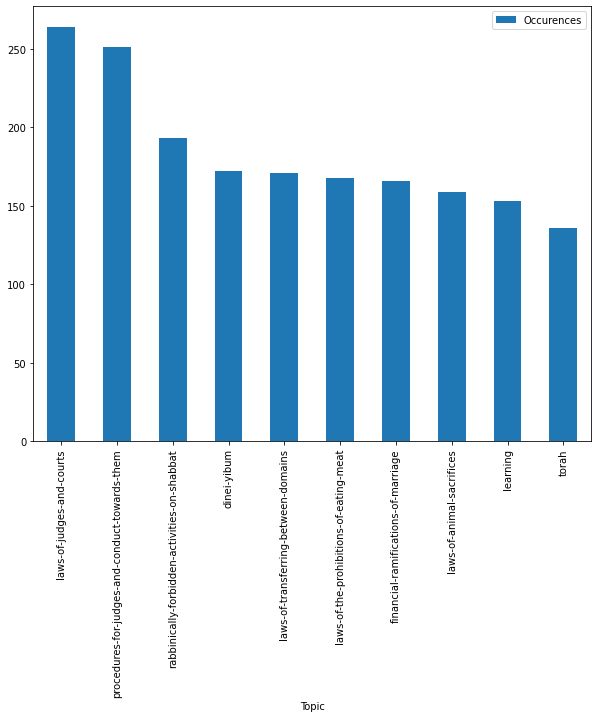

In [93]:
import matplotlib as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8

df = pd.DataFrame(top_ten, columns=['Topic','Occurences'])
df.plot(kind='bar', x='Topic')

In [94]:
# topics_df.columns[:10]
top_ten_list = [item[0] for item in top_ten]
top_ten_list

['laws-of-judges-and-courts',
 'procedures-for-judges-and-conduct-towards-them',
 'rabbinically-forbidden-activities-on-shabbat',
 'dinei-yibum',
 'laws-of-transferring-between-domains',
 'laws-of-the-prohibitions-of-eating-meat',
 'financial-ramifications-of-marriage',
 'laws-of-animal-sacrifices',
 'learning',
 'torah']

In [97]:
top_ten_topics_df = topics_df[top_ten_list]
top_ten_topics_df.head()

,laws-of-judges-and-courts,procedures-for-judges-and-conduct-towards-them,rabbinically-forbidden-activities-on-shabbat,dinei-yibum,laws-of-transferring-between-domains,laws-of-the-prohibitions-of-eating-meat,financial-ramifications-of-marriage,laws-of-animal-sacrifices,learning,torah
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [0]:
top_ten_topics_df.to_pickle('top_ten_topics_df.pkl')

In [99]:
top_ten_labels_df = topics_df[top_ten_list]
top_ten_labels_df.head()

,laws-of-judges-and-courts,procedures-for-judges-and-conduct-towards-them,rabbinically-forbidden-activities-on-shabbat,dinei-yibum,laws-of-transferring-between-domains,laws-of-the-prohibitions-of-eating-meat,financial-ramifications-of-marriage,laws-of-animal-sacrifices,learning,torah
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [0]:
top_ten_labels_df.to_pickle('top_ten_labels_df.pkl')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


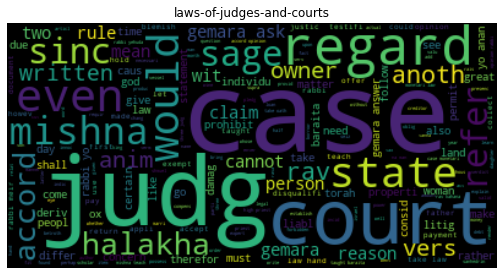

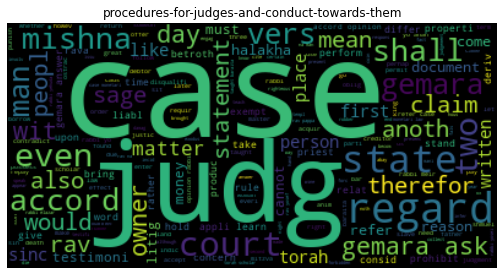

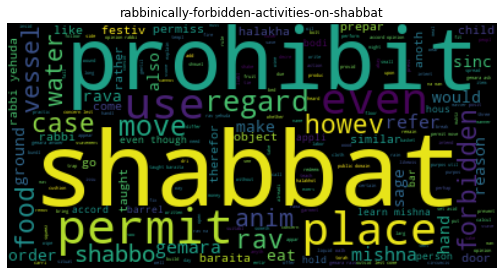

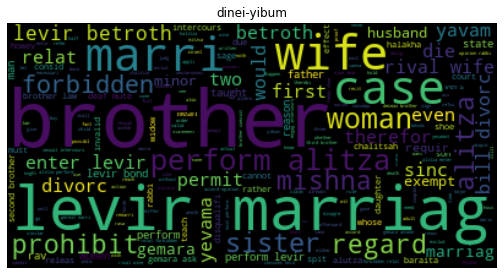

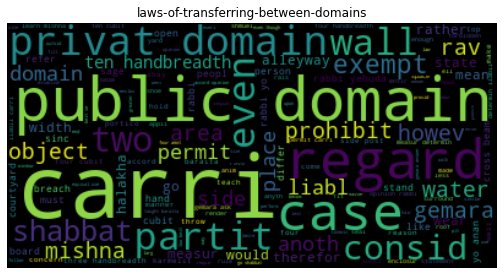

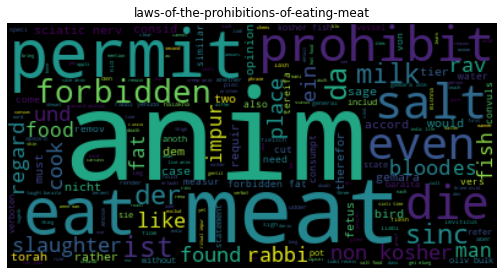

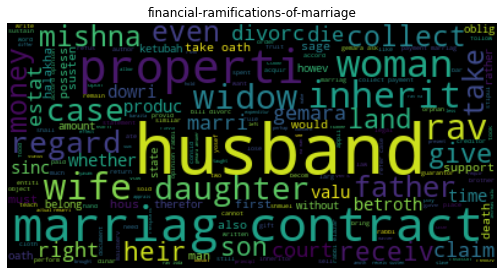

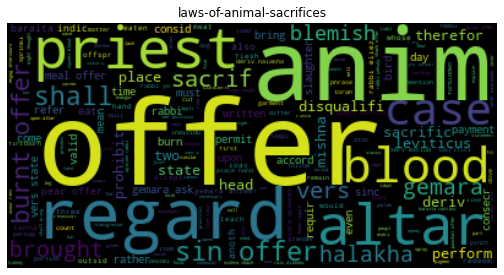

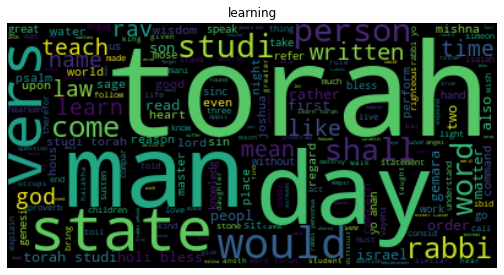

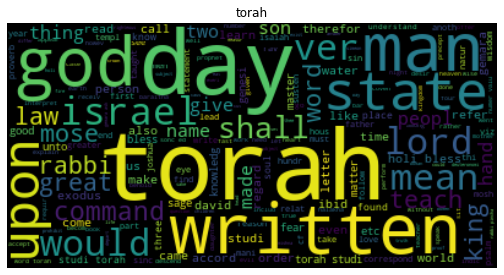

In [101]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')


stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['one','say','said','may']
stopwords.extend(newStopWords)

for index, topic in enumerate(top_ten_list[:]):

    words = ' '.join(list(topics_df[topics_df[topic] == 1]['En']))
    wc = WordCloud(stopwords=stopwords).generate(words)
    
    plt.figure(
        figsize = (8, 8), 
        facecolor = 'w')
    plt.imshow(wc, interpolation="bilinear")
    plt.tight_layout(pad = 3)
    plt.axis("off")
    plt.title(topic)

plt.show()